# WeatherPy
----

#### Observations and Insights
* The r-value of linear regression between the *maximum temperature (F)* and *latitude* at *northern hemisphere is closer to -1 suggesting a strong negative correlation* between the two variables.  As the city latitude moves farther away from the equator (0 degrees latitude), the temperature decreases or becomes colder, and the closer the city latitude is to the equator (0 degrees latitude), the temperature increases or becomes warmer.  
<br>
<br>
* There is no strong correlation between the *cloudiness* and *latitude* at either *northern or southern hemisphere*. 
<br>
<br>
* Likewise, there is also weak correlation between the *wind speed* and *latitude* at either *northern or southern hemisphere*. 

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Set a path for output file (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'City Count: {len(cities)}')

City Count: 635


In [3]:
# Create an initial dataframe for city, latitude and longtitude
cities_df = pd.DataFrame({'City' : cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,suntar,,,,,,,,
1,atuona,,,,,,,,
2,talnakh,,,,,,,,
3,sao joao,,,,,,,,
4,ushuaia,,,,,,,,


In [4]:
cities

['suntar',
 'atuona',
 'talnakh',
 'sao joao',
 'ushuaia',
 'bambous virieux',
 'ribeira grande',
 'qaanaaq',
 'azimur',
 'uribia',
 'hithadhoo',
 'lompoc',
 'port lincoln',
 'carnarvon',
 'yanan',
 'victoria',
 'busselton',
 'tiksi',
 'port hardy',
 'port elizabeth',
 'katherine',
 'santa ines',
 'puerto ayora',
 'pacific grove',
 'paradwip',
 'mataura',
 'bereda',
 'rikitea',
 'valparaiso',
 'sitka',
 'umzimvubu',
 'belaya gora',
 'thompson',
 'jamestown',
 'labuhan',
 'saint-pierre',
 'punta arenas',
 'yellowknife',
 'port alfred',
 'bethel',
 'bail hongal',
 'dikson',
 'wukari',
 'ballina',
 'yulara',
 'nizhneyansk',
 'barrow',
 'avarua',
 'saint-philippe',
 'provideniya',
 'barentsburg',
 'esperance',
 'huasahuasi',
 'albany',
 'khatanga',
 'semnan',
 'nikolskoye',
 'yichun',
 'taolanaro',
 'bredasdorp',
 'bangkal',
 'the valley',
 'smithers',
 'arraial do cabo',
 'new norfolk',
 'la palma',
 'woodward',
 'east london',
 'castro',
 'ust-nera',
 'salalah',
 'bluff',
 'teguise',
 'p

In [5]:
# Check JSON file contents
url = 'https://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key + '&units=imperial' + '&q=' + 'bluff'
response = requests.get(query_url).json()
response

{'coord': {'lon': 168.3333, 'lat': -46.6},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 52.81,
  'feels_like': 51.13,
  'temp_min': 52.81,
  'temp_max': 52.81,
  'pressure': 1010,
  'humidity': 71,
  'sea_level': 1010,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 20.56, 'deg': 247, 'gust': 28.3},
 'clouds': {'all': 89},
 'dt': 1650764445,
 'sys': {'type': 2,
  'id': 2008959,
  'country': 'NZ',
  'sunrise': 1650742486,
  'sunset': 1650779683},
 'timezone': 43200,
 'id': 2206939,
 'name': 'Bluff',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = 'https://api.openweathermap.org/data/2.5/weather?'

print('Beginning Data Retrieval')
print('------------------------------')

for index, row in cities_df.iterrows():
    try:
        city = row['City']
        query_url = url + 'appid=' + weather_api_key + '&units=imperial' + '&q=' + city
        cities_response = requests.get(query_url).json()
        cities_df.loc[index,"Lat"] = cities_response['coord']['lat']
        cities_df.loc[index,"Lng"] = cities_response['coord']['lon']
        cities_df.loc[index,"Max Temp"] = cities_response['main']['temp_max']
        cities_df.loc[index,"Humidity"] = cities_response['main']['humidity']
        cities_df.loc[index,"Cloudiness"] = cities_response['clouds']['all']
        cities_df.loc[index,"Wind Speed"] = cities_response['wind']['speed']
        cities_df.loc[index,"Country"] = cities_response['sys']['country']
        cities_df.loc[index,"Date"] = cities_response['dt']        
        record_no = cities.index(city) + 1       
        print(f'Processing Record {record_no} of Set of 1 | {city}')
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set of 1 | suntar
Processing Record 2 of Set of 1 | atuona
Processing Record 3 of Set of 1 | talnakh
Processing Record 4 of Set of 1 | sao joao
Processing Record 5 of Set of 1 | ushuaia
Processing Record 6 of Set of 1 | bambous virieux
Processing Record 7 of Set of 1 | ribeira grande
Processing Record 8 of Set of 1 | qaanaaq
City not found. Skipping...
Processing Record 10 of Set of 1 | uribia
Processing Record 11 of Set of 1 | hithadhoo
Processing Record 12 of Set of 1 | lompoc
Processing Record 13 of Set of 1 | port lincoln
Processing Record 14 of Set of 1 | carnarvon
City not found. Skipping...
Processing Record 16 of Set of 1 | victoria
Processing Record 17 of Set of 1 | busselton
Processing Record 18 of Set of 1 | tiksi
Processing Record 19 of Set of 1 | port hardy
Processing Record 20 of Set of 1 | port elizabeth
Processing Record 21 of Set of 1 | katherine
Processing Record 22 of Set of 1 | santa ines

City not found. Skipping...
Processing Record 188 of Set of 1 | pitimbu
Processing Record 189 of Set of 1 | kasongo-lunda
Processing Record 190 of Set of 1 | el sauce
Processing Record 191 of Set of 1 | cherskiy
Processing Record 192 of Set of 1 | rancho palos verdes
City not found. Skipping...
Processing Record 194 of Set of 1 | luziania
Processing Record 195 of Set of 1 | changji
Processing Record 196 of Set of 1 | mundybash
Processing Record 197 of Set of 1 | waipawa
Processing Record 198 of Set of 1 | asau
City not found. Skipping...
Processing Record 200 of Set of 1 | segezha
Processing Record 201 of Set of 1 | pangoa
Processing Record 202 of Set of 1 | ixtapa
Processing Record 203 of Set of 1 | milkovo
Processing Record 204 of Set of 1 | naryan-mar
Processing Record 205 of Set of 1 | prescott
Processing Record 206 of Set of 1 | bocaiuva
Processing Record 207 of Set of 1 | vanavara
City not found. Skipping...
City not found. Skipping...
Processing Record 210 of Set of 1 | lebu
Cit

Processing Record 374 of Set of 1 | korla
City not found. Skipping...
City not found. Skipping...
Processing Record 377 of Set of 1 | aykhal
Processing Record 378 of Set of 1 | kalmunai
Processing Record 379 of Set of 1 | riyadh
Processing Record 380 of Set of 1 | kosonsoy
Processing Record 381 of Set of 1 | togur
Processing Record 382 of Set of 1 | portland
Processing Record 383 of Set of 1 | salinas
Processing Record 384 of Set of 1 | blackfoot
Processing Record 385 of Set of 1 | altamira
Processing Record 386 of Set of 1 | saint-joseph
City not found. Skipping...
Processing Record 388 of Set of 1 | el vigia
City not found. Skipping...
Processing Record 390 of Set of 1 | natal
Processing Record 391 of Set of 1 | sitarganj
Processing Record 392 of Set of 1 | new port richey
City not found. Skipping...
Processing Record 394 of Set of 1 | fengcheng
City not found. Skipping...
Processing Record 396 of Set of 1 | faanui
Processing Record 397 of Set of 1 | almeirim
Processing Record 398 of

Processing Record 563 of Set of 1 | belmonte
Processing Record 564 of Set of 1 | darovskoy
Processing Record 565 of Set of 1 | ulcinj
Processing Record 566 of Set of 1 | caravelas
Processing Record 567 of Set of 1 | lata
Processing Record 568 of Set of 1 | gawler
City not found. Skipping...
Processing Record 570 of Set of 1 | binzhou
Processing Record 571 of Set of 1 | jamame
Processing Record 572 of Set of 1 | taltal
Processing Record 573 of Set of 1 | manchester
Processing Record 574 of Set of 1 | khani
Processing Record 575 of Set of 1 | dong hoi
Processing Record 576 of Set of 1 | edd
Processing Record 577 of Set of 1 | santa rosa
City not found. Skipping...
Processing Record 579 of Set of 1 | kendal
Processing Record 580 of Set of 1 | zhezkazgan
Processing Record 581 of Set of 1 | emerald
Processing Record 582 of Set of 1 | mondeville
Processing Record 583 of Set of 1 | kenai
City not found. Skipping...
Processing Record 585 of Set of 1 | keti bandar
Processing Record 586 of Set o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export the city data into a .csv
cities_df.to_csv(output_data_file, index = False, header = True)

In [8]:
# Display the city data frame
cities_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,suntar,62.1444,117.632,33.26,64,100,4,RU,1650764446
1,atuona,-9.8,-139.033,79.5,77,76,16.64,PF,1650764446
2,talnakh,69.4865,88.3972,-0.8,95,56,3.02,RU,1650763870
3,sao joao,-8.8756,-36.3667,68.23,95,86,4.65,BR,1650764447
4,ushuaia,-54.8,-68.3,42.46,75,40,2.3,AR,1650764448
5,bambous virieux,-20.3428,57.7575,75.45,69,40,16.11,MU,1650764449
6,ribeira grande,38.5167,-28.7,58.75,68,64,19.37,PT,1650764450
7,qaanaaq,77.484,-69.3632,-4,77,27,6.51,GL,1650764450
8,azimur,,,,,,,,
9,uribia,11.7139,-72.266,81.41,68,98,14.18,CO,1650764451


In [9]:
cities_df.count()

City          635
Lat           635
Lng           635
Max Temp      635
Humidity      635
Cloudiness    635
Wind Speed    635
Country       635
Date          635
dtype: int64

In [10]:
cities_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [11]:
# Convert latitute, longtitude, max temp, humidity, cloudiness and wind speed to numeric type
city_data = cities_df

city_data["Lat"] = cities_df["Lat"].apply(pd.to_numeric).round(decimals=2)
city_data["Lng"] = cities_df["Lng"].apply(pd.to_numeric).round(decimals=2)
city_data["Max Temp"] = cities_df["Max Temp"].apply(pd.to_numeric)
city_data["Humidity"] = cities_df["Humidity"].apply(pd.to_numeric)
city_data["Cloudiness"] = cities_df["Cloudiness"].apply(pd.to_numeric)
city_data["Wind Speed"] = cities_df["Wind Speed"].apply(pd.to_numeric)
city_data["Date"] = cities_df["Date"].apply(pd.to_numeric)
city_data

# Display the city data frame descriptive statistics
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,18.478497,20.297979,61.364059,70.265976,56.412781,7.693921,1.650765e+09
std,33.108807,88.979000,20.219936,21.830070,40.839850,5.901928,1.614316e+02
min,-54.800000,-179.170000,-7.370000,6.000000,0.000000,0.000000,1.650764e+09
25%,-8.765000,-58.105000,47.680000,62.000000,11.000000,3.440000,1.650765e+09
50%,21.050000,24.730000,65.620000,74.000000,71.000000,5.990000,1.650765e+09
75%,46.030000,99.925000,77.045000,87.000000,100.000000,10.615000,1.650765e+09
max,78.220000,179.320000,95.140000,100.000000,100.000000,41.430000,1.650765e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Checks whether there are any cities with humidity > 100% (Results: None)
humidity_check = city_data.loc[city_data['Humidity'] >100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

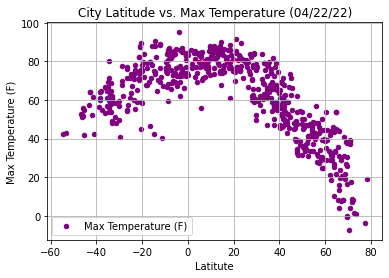

In [13]:
# Create a series of scatter plots to showcase the following relationships between temperature (F) vs. city latitude
city_data.plot(kind='scatter', x='Lat', y='Max Temp',
               grid=True, color ='purple', label = 'Max Temperature (F)',
               title ='City Latitude vs. Max Temperature (04/22/22)') 
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitute')
plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

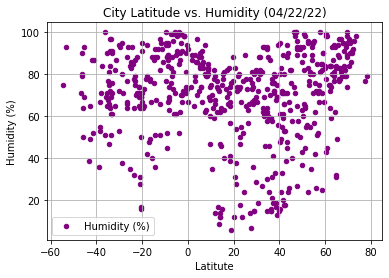

In [14]:
# Create a series of scatter plots to showcase the following relationships between humidity (%) vs. city latitude
city_data.plot(kind='scatter', x='Lat', y='Humidity',
               grid=True, color ='purple', 
               label = 'Humidity (%)', title = 'City Latitude vs. Humidity (04/22/22)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitute')
plt.savefig('../output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

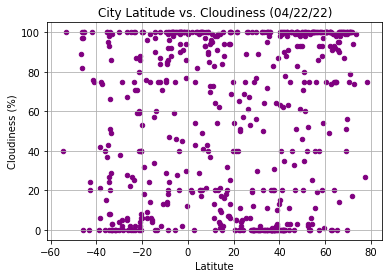

In [15]:
# Create a series of scatter plots to showcase the following relationships between cloudiness (%) vs. city latitude
city_data.plot(kind='scatter', x='Lat', y='Cloudiness',
               grid=True, color ='purple', 
               title = 'City Latitude vs. Cloudiness (04/22/22)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitute')
plt.savefig('../output_data/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

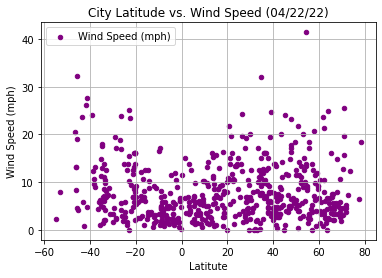

In [16]:
# Create a series of scatter plots to showcase the following relationships between wind speed (mph) vs. city latitude
city_data.plot(kind='scatter', x='Lat', y='Wind Speed',
               grid=True, color ='purple', 
               label ='Wind Speed (mph)', title = 'City Latitude vs. Wind Speed (04/22/22)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitute')
plt.savefig('../output_data/Fig4.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8869052110416592


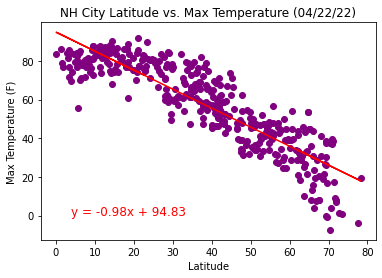

In [17]:
# Calculate linear regression between temperature (F) and latitude at northern hemisphere
city_data_nh = city_data.loc[city_data['Lat'] >=0]
y_values = city_data_nh['Max Temp']
x_values = city_data_nh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,0.5),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('NH City Latitude vs. Max Temperature (04/22/22)')
plt.savefig('../output_data/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6619102563973964


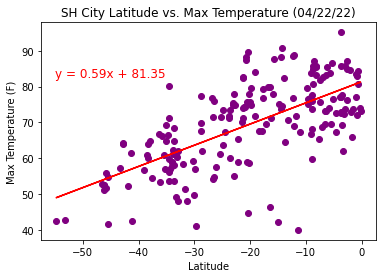

In [18]:
# Calculate linear regression between temperature (F) and latitude at southern hemisphere
city_data_sh = city_data.loc[city_data['Lat'] <0]
y_values = city_data_sh['Max Temp']
x_values = city_data_sh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,82.5),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('SH City Latitude vs. Max Temperature (04/22/22)')
plt.savefig('../output_data/Fig6.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21496331976240451


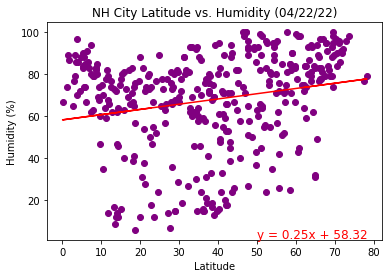

In [19]:
# Calculate linear regression between humidity (%) and latitude at northern hemisphere
city_data_nh = city_data.loc[city_data['Lat'] >=0]
y_values = city_data_nh['Humidity']
x_values = city_data_nh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,2),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('NH City Latitude vs. Humidity (04/22/22)')
plt.savefig('../output_data/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2448685362497919


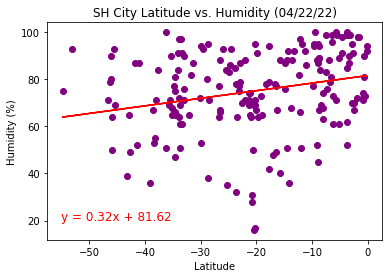

In [20]:
# Calculate linear regression between humidity (%) and latitude at southern hemisphere
city_data_sh = city_data.loc[city_data['Lat'] <0]
y_values = city_data_sh['Humidity']
x_values = city_data_sh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('SH City Latitude vs. Humidity (04/22/22)')
plt.savefig('../output_data/Fig8.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21562690270488438


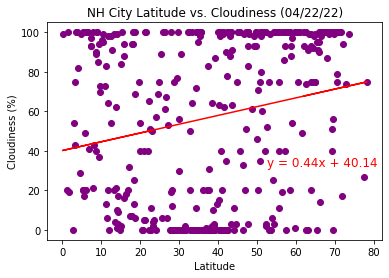

In [21]:
# Calculate linear regression between cloudiness (%) and latitude at northern hemisphere
city_data_nh = city_data.loc[city_data['Lat'] >=0]
y_values = city_data_nh['Cloudiness']
x_values = city_data_nh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52.5,32.5),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('NH City Latitude vs. Cloudiness (04/22/22)')
plt.savefig('../output_data/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24941915853499014


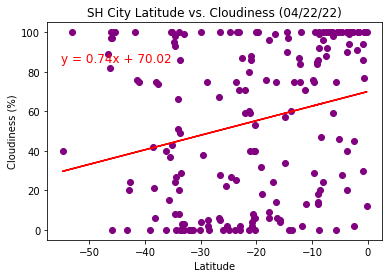

In [22]:
# Calculate linear regression between cloudiness (%) and latitude at southern hemisphere
city_data_sh = city_data.loc[city_data['Lat'] <0]
y_values = city_data_sh['Cloudiness']
x_values = city_data_sh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('SH City Latitude vs. Cloudiness (04/22/22)')
plt.savefig('../output_data/Fig10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05644109467484308


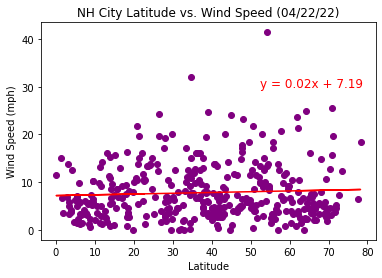

In [23]:
# Calculate linear regression between wind speed (mph) and latitude at northern hemisphere
city_data_nh = city_data.loc[city_data['Lat'] >=0]
y_values = city_data_nh['Wind Speed']
x_values = city_data_nh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52.5,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('NH City Latitude vs. Wind Speed (04/22/22)')
plt.savefig('../output_data/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4128678668593742


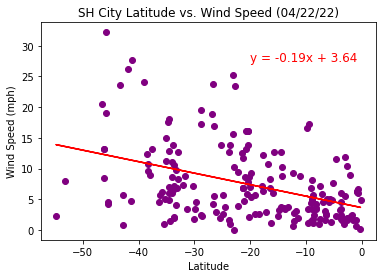

In [24]:
# Calculate linear regression between wind speed (mph) and latitude at southern hemisphere
city_data_sh = city_data.loc[city_data['Lat'] <0]
y_values = city_data_sh['Wind Speed']
x_values = city_data_sh['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='purple')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,27.5),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('SH City Latitude vs. Wind Speed (04/22/22)')
plt.savefig('../output_data/Fig12.png')
plt.show()